In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report



In [3]:
df = pd.read_csv("/content/data-set for decision tree.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

  workclass     education marital.status         occupation   relationship  \
0         ?       HS-grad        Widowed                  ?  Not-in-family   
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
2         ?  Some-college        Widowed                  ?      Unmarried   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   

    race     sex native.country income  
0  White  Female  United-States  <=50K  
1  White  Female  United-States  <=50K  
2  Black  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 

In [4]:
df.replace("?", np.nan, inplace=True)

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   workclass  education  marital.status  occupation  relationship  race  sex  \
0          3         11               6           9             1     4    0   
1          3         11               6           3             1     4    0   
2          3         15               6           9             4     2    0   
3          3          5               0           6             4     4    0   
4          3         15               5           9             3     4    0   

   native.country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4              38       0  


<ipython-input-4-9016a4e22b19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [5]:
df.replace("?", np.nan, inplace=True)

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   workclass  education  marital.status  occupation  relationship  race  sex  \
0          3         11               6           9             1     4    0   
1          3         11               6           3             1     4    0   
2          3         15               6           9             4     2    0   
3          3          5               0           6             4     4    0   
4          3         15               5           9             3     4    0   

   native.country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4              38       0  


<ipython-input-5-9016a4e22b19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-5-9016a4e22b19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [7]:


X = df.drop(columns=["income"])
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.812375249500998
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4976
           1       0.62      0.53      0.57      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.71      0.72      6513
weighted avg       0.80      0.81      0.81      6513



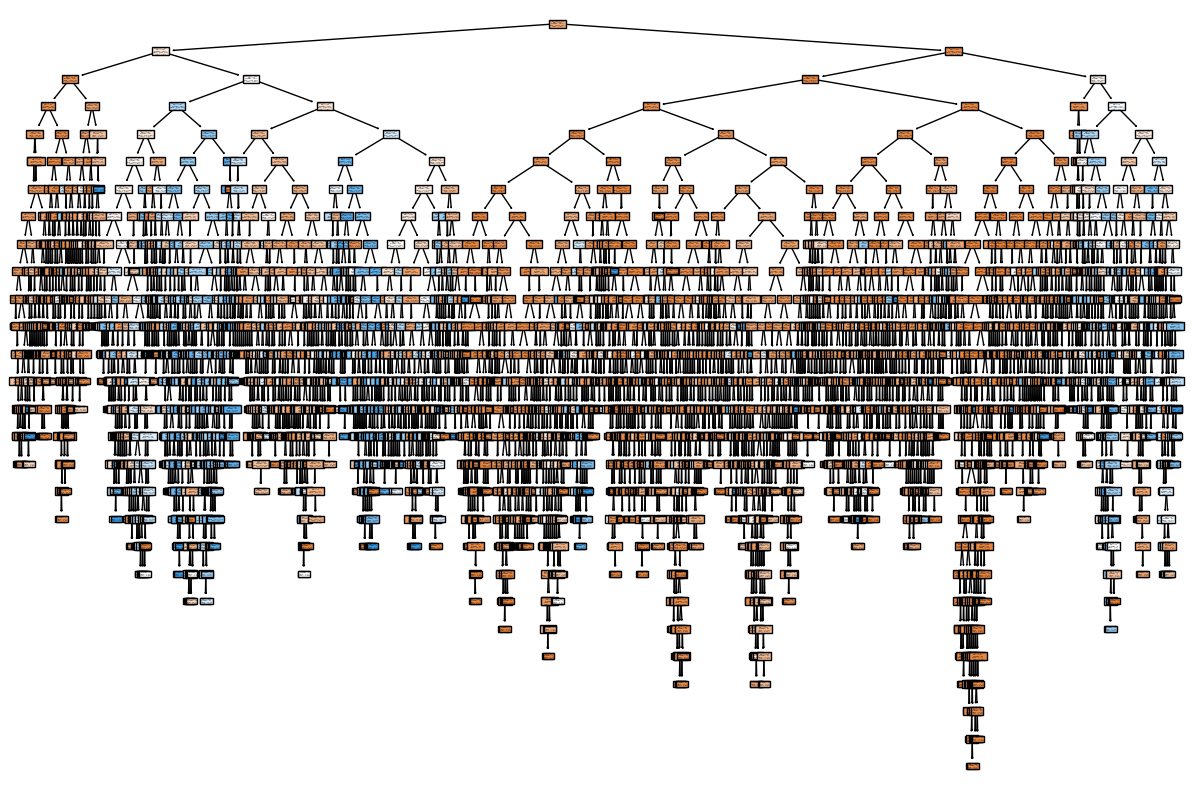

In [11]:


plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["<=50K", ">50K"])
plt.show()